<a href="https://colab.research.google.com/github/ngoc43456/DuDoanKhaNangMacBenhTimMach/blob/main/D%E1%BB%B1_%C4%91o%C3%A1n_kh%E1%BA%A3_n%C4%83ng_m%E1%BA%AFc_b%E1%BB%87nh_tim_m%E1%BA%A1ch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo graphviz --quiet

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from graphviz import Digraph
from IPython.display import Image
import joblib
from scipy import stats
from scipy.stats import shapiro, skew
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# URL c·ªßa dataset Cleveland (ph·ªï bi·∫øn nh·∫•t)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# T√™n c√°c c·ªôt theo m√¥ t·∫£ c·ªßa UCI
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
    'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'
]

# ƒê·ªçc d·ªØ li·ªáu
df = pd.read_csv(url, names=column_names, na_values='?')

# Xem th√¥ng tin
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  299.000000   
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.672241   
std      0.994971   22.875003    0.469794    1.161075    0.616226    0.937438   
min      0.000000   71.000000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    3.000000    3.000000   

             thal      target  
count  301.000000  303.000000  
mean     4.734219    0.937294  
std      1.939706    1.228536  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    2.000000  
max      7.000000    4.000000

In [ ]:
# Ch·ªçn c√°c bi·∫øn ph√¢n lo·∫°i ƒë·ªÉ ki·ªÉm tra
categorical_vars = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

# ƒê·∫øm s·ªë l∆∞·ª£ng v√† t√≠nh % cho t·ª´ng bi·∫øn
for var in categorical_vars:
    print(f"\n‚ñ∂ Bi·∫øn: {var}")
    counts = df[var].value_counts(dropna=False).sort_index()
    percents = df[var].value_counts(normalize=True, dropna=False).sort_index() * 100
    summary = pd.DataFrame({'Gi√° tr·ªã': counts.index, 'S·ªë l∆∞·ª£ng': counts.values, 'T·ª∑ l·ªá (%)': percents.values})
    print(summary.to_string(index=False))


‚ñ∂ Bi·∫øn: sex
 Gi√° tr·ªã  S·ªë l∆∞·ª£ng  T·ª∑ l·ªá (%)
     0.0        97  32.013201
     1.0       206  67.986799

‚ñ∂ Bi·∫øn: cp
 Gi√° tr·ªã  S·ªë l∆∞·ª£ng  T·ª∑ l·ªá (%)
     1.0        23   7.590759
     2.0        50  16.501650
     3.0        86  28.382838
     4.0       144  47.524752

‚ñ∂ Bi·∫øn: fbs
 Gi√° tr·ªã  S·ªë l∆∞·ª£ng  T·ª∑ l·ªá (%)
     0.0       258  85.148515
     1.0        45  14.851485

‚ñ∂ Bi·∫øn: restecg
 Gi√° tr·ªã  S·ªë l∆∞·ª£ng  T·ª∑ l·ªá (%)
     0.0       151  49.834983
     1.0         4   1.320132
     2.0       148  48.844884

‚ñ∂ Bi·∫øn: exang
 Gi√° tr·ªã  S·ªë l∆∞·ª£ng  T·ª∑ l·ªá (%)
     0.0       204  67.326733
     1.0        99  32.673267

‚ñ∂ Bi·∫øn: slope
 Gi√° tr·ªã  S·ªë l∆∞·ª£ng  T·ª∑ l·ªá (%)
     1.0       142  46.864686
     2.0       140  46.204620
     3.0        21   6.930693

‚ñ∂ Bi·∫øn: ca
 Gi√° tr·ªã  S·ªë l∆∞·ª£ng  T·ª∑ l·ªá (%)
     0.0       176  58.085809
     1.0        65  21.452145
     2.0        38  12.541254
     3.0   

In [ ]:
# In t·ªâ l·ªá missing value cho t·ª´ng c·ªôt
missing_percent = (df.isnull().sum() / len(df)) * 100
print("T·ªâ l·ªá missing value (%):")
print(missing_percent[missing_percent > 0].round(2))

T·ªâ l·ªá missing value (%):
ca      1.32
thal    0.66
dtype: float64


In [ ]:
df_filled = df.copy()
# D√πng mode (gi√° tr·ªã xu·∫•t hi·ªán nhi·ªÅu nh·∫•t) cho categorical
df_filled.fillna({
    'ca': df_filled['ca'].mode()[0],
    'thal': df_filled['thal'].mode()[0]
}, inplace=True)

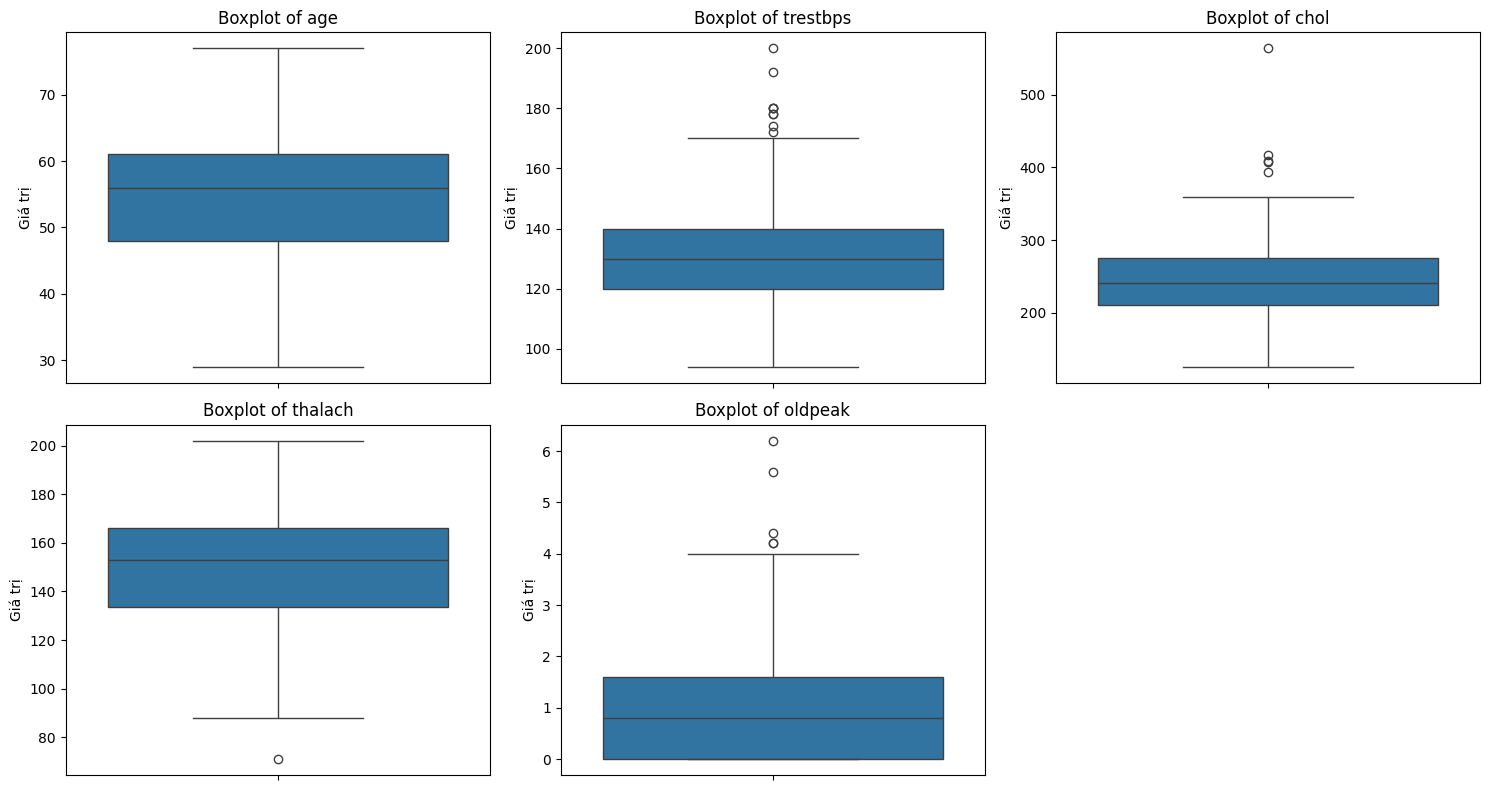

In [ ]:
# Danh s√°ch c√°c bi·∫øn li√™n t·ª•c c·∫ßn ki·ªÉm tra
continuous_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# V·∫Ω boxplot cho t·ª´ng bi·∫øn
plt.figure(figsize=(15, 8))

for i, col in enumerate(continuous_columns, 1):
    plt.subplot(2, 3, i)  # Chia l∆∞·ªõi 2 h√†ng 3 c·ªôt
    sns.boxplot(y=df_filled[col])
    plt.title(f'Boxplot of {col}')
    plt.ylabel('Gi√° tr·ªã')

plt.tight_layout()
plt.show()

In [ ]:
# T√°ch bi·∫øn ƒë·∫ßu v√†o v√† ƒë·∫ßu ra
X = df_filled.drop('target', axis=1)
y = df_filled['target'].apply(lambda x: 1 if int(x) > 0 else 0)

 B·∫ÆT ƒê·∫¶U PH√ÇN T√çCH OUTLIERS...
=== THALACH ===
Outliers detected: 1
IQR bounds: 84.8 - 214.8

=== OLDPEAK ===
Outliers detected: 5

=== AGE ===
Outliers detected: 0

=== TRESTBPS ===
Outliers detected: 9

=== CHOL ===
Outliers detected: 5

 TH·ªêNG K√ä TR∆Ø·ªöC V√Ä SAU X·ª¨ L√ù:

--- THALACH ---
Tr∆∞·ªõc: Min=71.0, Max=202.0, Median=153.0
Sau:   Min=84.8, Max=202.0, Median=153.0
Outliers: 1 ‚Üí 0

--- OLDPEAK ---
Tr∆∞·ªõc: Min=0.0, Max=6.2, Median=0.8
Sau:   Min=0.0, Max=4.0, Median=0.8
Outliers: 5 ‚Üí 0

--- AGE ---
Tr∆∞·ªõc: Min=29.0, Max=77.0, Median=56.0
Sau:   Min=29.0, Max=77.0, Median=56.0
Outliers: 0 ‚Üí 0

--- TRESTBPS ---
Tr∆∞·ªõc: Min=94.0, Max=200.0, Median=130.0
Sau:   Min=94.0, Max=170.0, Median=130.0
Outliers: 9 ‚Üí 0

--- CHOL ---
Tr∆∞·ªõc: Min=126.0, Max=564.0, Median=241.0
Sau:   Min=126.0, Max=371.0, Median=241.0
Outliers: 5 ‚Üí 0


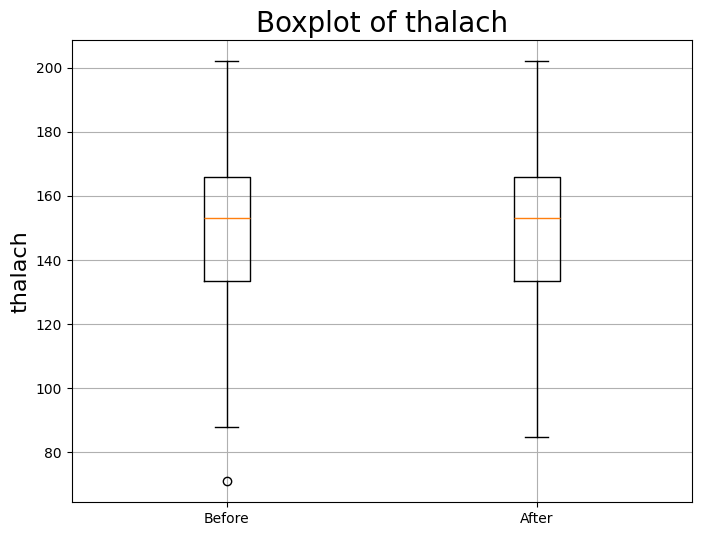

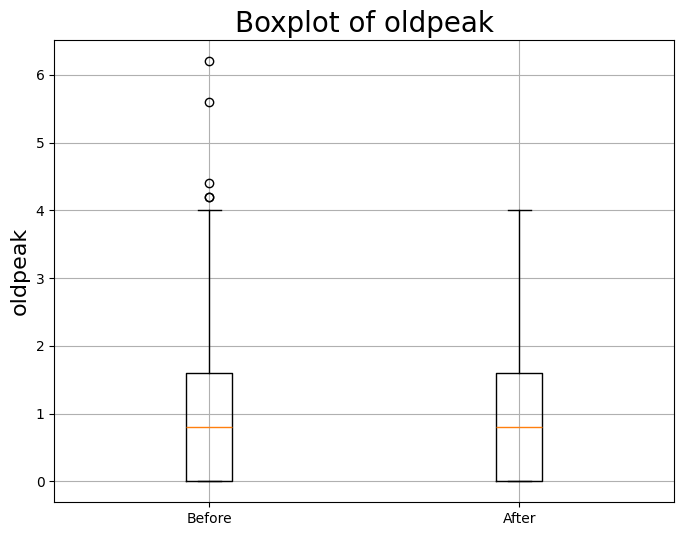

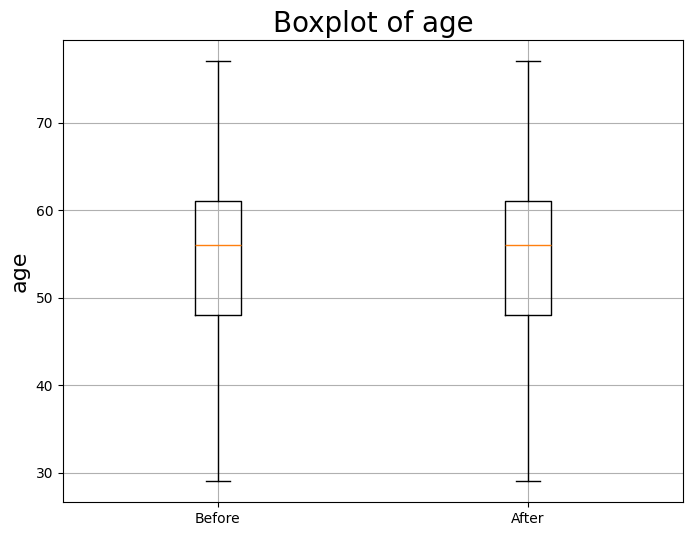

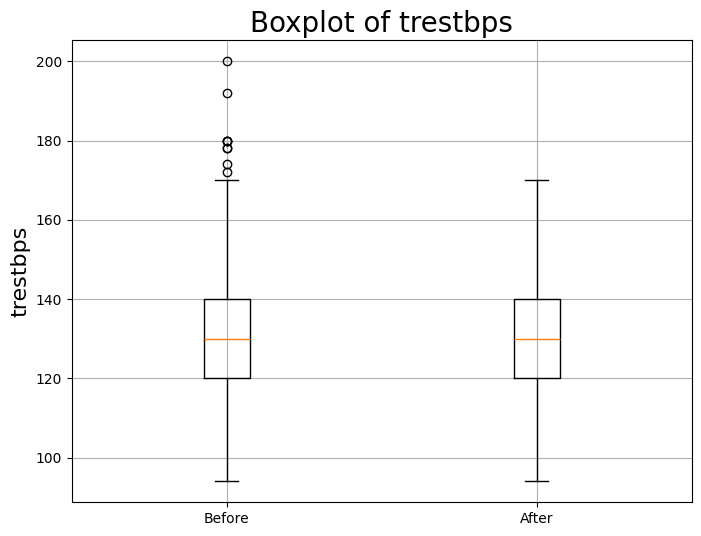

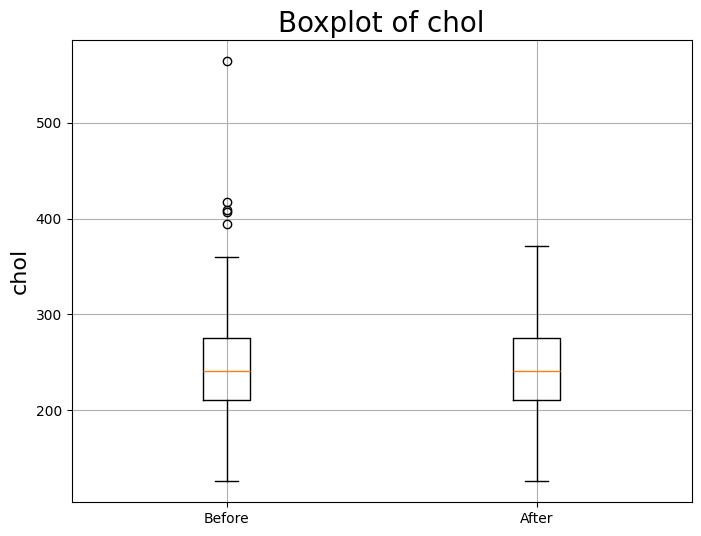


 KI·ªÇM TRA T√çNH CHU·∫®N (SHAPIRO-WILK TEST):
   shapiro_p  is_normal  skewness
0     0.0001      False   -0.4908
1     0.0000      False    0.9929
2     0.0061      False   -0.2080
3     0.0000      False    0.3814
4     0.0201      False    0.3294

 HO√ÄN TH√ÄNH! D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c x·ª≠ l√Ω.


In [ ]:
# Ph∆∞∆°ng ph√°p x·ª≠ l√Ω outliers
class OutlierHandler:

    def __init__(self, data):
        self.data = data.copy()

    def detect_outliers_iqr(self, column):
        """Ph√°t hi·ªán outliers b·∫±ng ph∆∞∆°ng ph√°p IQR"""
        Q1 = self.data[column].quantile(0.25)
        Q3 = self.data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = self.data[(self.data[column] < lower_bound) |
                             (self.data[column] > upper_bound)]
        return outliers, lower_bound, upper_bound

    def detect_outliers_zscore(self, column, threshold=3):
        """Ph√°t hi·ªán outliers b·∫±ng Z-score"""
        z_scores = np.abs(stats.zscore(self.data[column]))
        outliers = self.data[z_scores > threshold]
        return outliers

    def cap_outliers_iqr(self, column):
        """Gi·ªõi h·∫°n outliers (capping) theo IQR"""
        Q1 = self.data[column].quantile(0.25)
        Q3 = self.data[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        self.data[column] = np.clip(self.data[column], lower_bound, upper_bound)
        return self.data

    def remove_outliers(self, column, method='iqr'):
        """Lo·∫°i b·ªè outliers"""
        if method == 'iqr':
            _, lower_bound, upper_bound = self.detect_outliers_iqr(column)
            self.data = self.data[(self.data[column] >= lower_bound) &
                                  (self.data[column] <= upper_bound)]
        elif method == 'zscore':
            z_scores = np.abs(stats.zscore(self.data[column]))
            self.data = self.data[z_scores <= 3]
        return self.data

    def transform_data(self, column, method='log'):
        if method == 'log':
            self.data[f'{column}_log'] = np.log1p(self.data[column])  # log1p ƒë·ªÉ tr√°nh log(0)
        elif method == 'sqrt':
            self.data[f'{column}_sqrt'] = np.sqrt(self.data[column])
        return self.data



# H∆∞·ªõng d·∫´n x·ª≠ l√Ω c·ª• th·ªÉ cho t·ª´ng bi·∫øn
def process_heart_data(df):
    """
    X·ª≠ l√Ω outliers cho d·ªØ li·ªáu tim m·∫°ch
    """
    handler = OutlierHandler(df)

    # 1. THALACH
    print("=== THALACH ===")
    outliers, lower, upper = handler.detect_outliers_iqr('thalach')
    print(f"Outliers detected: {len(outliers)}")
    print(f"IQR bounds: {lower:.1f} - {upper:.1f}")
    handler.cap_outliers_iqr('thalach')

    # 2. OLDPEAK
    print("\n=== OLDPEAK ===")
    outliers, lower, upper = handler.detect_outliers_iqr('oldpeak')
    print(f"Outliers detected: {len(outliers)}")
    handler.cap_outliers_iqr('oldpeak')

    # 3. AGE
    print("\n=== AGE ===")
    outliers, lower, upper = handler.detect_outliers_iqr('age')
    print(f"Outliers detected: {len(outliers)}")
    handler.data['age'] = np.clip(handler.data['age'], 18, 100)

    # 4. TRESTBPS
    print("\n=== TRESTBPS ===")
    outliers, lower, upper = handler.detect_outliers_iqr('trestbps')
    print(f"Outliers detected: {len(outliers)}")
    handler.cap_outliers_iqr('trestbps')

    # 5. CHOL
    print("\n=== CHOL ===")
    outliers, lower, upper = handler.detect_outliers_iqr('chol')
    print(f"Outliers detected: {len(outliers)}")
    handler.data.loc[handler.data['chol'] == 0, 'chol'] = handler.data['chol'].median()
    handler.cap_outliers_iqr('chol')

    return handler.data

def check_normality(df, columns):
    """
    Ki·ªÉm tra t√≠nh chu·∫©n c·ªßa c√°c bi·∫øn v·ªõi Shapiro-Wilk Test v√† t√≠nh ƒë·ªô l·ªách Skewness
    Tr·∫£ v·ªÅ DataFrame k·∫øt qu·∫£
    """
    results = []

    for col in columns:
        stat, p_value = shapiro(df[col])
        is_normal = p_value > 0.05  # p > 0.05 th√¨ gi·∫£ thi·∫øt H0 kh√¥ng b·ªã b√°c b·ªè => ph√¢n ph·ªëi chu·∫©n
        skewness_value = skew(df[col])

        results.append({
            'column': col,
            'shapiro_p': p_value,
            'is_normal': is_normal,
            'skewness': skewness_value
        })

    return pd.DataFrame(results)

def plot_before_after(original_data, processed_data, columns):
    """
    V·∫Ω t·ª´ng boxplot ri√™ng bi·ªát ƒë·ªÉ so s√°nh
    """
    for col in columns:
        plt.figure(figsize=(8, 6))  # M·ªói bi·ªÉu ƒë·ªì chi·∫øm nguy√™n khung h√¨nh
        plt.boxplot([original_data[col], processed_data[col]], tick_labels=['Before', 'After'])
        plt.title(f'Boxplot of {col}', fontsize=20)
        plt.ylabel(col, fontsize=16)
        plt.grid(True)
        plt.show()

# CH·∫†Y CODE TH·ª∞C T·∫æ
if 'df' in locals() or 'df' in globals():
    print(" B·∫ÆT ƒê·∫¶U PH√ÇN T√çCH OUTLIERS...")
    print("=" * 50)

    # T·∫°o b·∫£n copy ƒë·ªÉ so s√°nh tr∆∞·ªõc v√† sau
    original_data = df_filled.copy()

    # X·ª≠ l√Ω outliers
    processed_data = process_heart_data(df_filled)

    print("\n TH·ªêNG K√ä TR∆Ø·ªöC V√Ä SAU X·ª¨ L√ù:")
    print("=" * 50)

    columns_to_check = ['thalach', 'oldpeak', 'age', 'trestbps', 'chol']

    for col in columns_to_check:
        if col in original_data.columns:
            print(f"\n--- {col.upper()} ---")
            print(f"Tr∆∞·ªõc: Min={original_data[col].min():.1f}, Max={original_data[col].max():.1f}, Median={original_data[col].median():.1f}")
            print(f"Sau:   Min={processed_data[col].min():.1f}, Max={processed_data[col].max():.1f}, Median={processed_data[col].median():.1f}")

            # ƒê·∫øm outliers b·∫±ng IQR
            Q1_orig = original_data[col].quantile(0.25)
            Q3_orig = original_data[col].quantile(0.75)
            IQR_orig = Q3_orig - Q1_orig
            outliers_orig = ((original_data[col] < Q1_orig - 1.5 * IQR_orig) |
                             (original_data[col] > Q3_orig + 1.5 * IQR_orig)).sum()

            Q1_proc = processed_data[col].quantile(0.25)
            Q3_proc = processed_data[col].quantile(0.75)
            IQR_proc = Q3_proc - Q1_proc
            outliers_proc = ((processed_data[col] < Q1_proc - 1.5 * IQR_proc) |
                             (processed_data[col] > Q3_proc + 1.5 * IQR_proc)).sum()

            print(f"Outliers: {outliers_orig} ‚Üí {outliers_proc}")

    # V·∫Ω bi·ªÉu ƒë·ªì boxplot so s√°nh
    plot_before_after(original_data, processed_data, columns_to_check)

    # Ki·ªÉm tra t√≠nh chu·∫©n
    print("\n KI·ªÇM TRA T√çNH CHU·∫®N (SHAPIRO-WILK TEST):")
    print("=" * 50)
    normality_results = check_normality(processed_data, columns_to_check)
    print(normality_results[['shapiro_p', 'is_normal', 'skewness']].round(4))

    print(f"\n HO√ÄN TH√ÄNH! D·ªØ li·ªáu ƒë√£ ƒë∆∞·ª£c x·ª≠ l√Ω.")

else:
    print(" KH√îNG T√åM TH·∫§Y DATAFRAME 'df'")
    print("Vui l√≤ng:")
    print("1. ƒê·ªïi t√™n DataFrame c·ªßa b·∫°n th√†nh 'df', HO·∫∂C")
    print("2. Thay 'df' trong code th√†nh t√™n DataFrame th·ª±c t·∫ø c·ªßa b·∫°n")
    print("\nV√≠ d·ª•:")
    print("# N·∫øu DataFrame c·ªßa b·∫°n t√™n l√† 'heart_data':")
    print("# processed_data = process_heart_data(heart_data)")


In [ ]:
def auto_transform_skewed_data(df, columns, skew_threshold=1, keep_original=True):
    """
    T·ª± ƒë·ªông ph√°t hi·ªán v√† bi·∫øn ƒë·ªïi c√°c c·ªôt c√≥ skewness cao.

    Parameters:
    - df: DataFrame ƒë·∫ßu v√†o
    - columns: Danh s√°ch c√°c c·ªôt c·∫ßn ki·ªÉm tra
    - skew_threshold: Ng∆∞·ª°ng skewness ƒë·ªÉ quy·∫øt ƒë·ªãnh c√≥ c·∫ßn bi·∫øn ƒë·ªïi
    - keep_original: Gi·ªØ c·ªôt g·ªëc hay thay th·∫ø b·∫±ng c·ªôt m·ªõi

    Returns:
    - DataFrame sau bi·∫øn ƒë·ªïi
    - Danh s√°ch c√°c c·ªôt ƒë√£ bi·∫øn ƒë·ªïi
    """
    handler = OutlierHandler(df)
    transformed_columns = []

    for col in columns:
        skew_value = stats.skew(handler.data[col].dropna())
        print(f" {col}: Skewness = {skew_value:.4f}")

        if abs(skew_value) > skew_threshold:
            if (handler.data[col] <= 0).any():
                print(f" {col} c√≥ gi√° tr·ªã <= 0, s·ª≠ d·ª•ng ‚àö (sqrt transformation)")
                handler.transform_data(col, method='sqrt')
                new_col = f'{col}_sqrt'
            else:
                print(f" {col} c√≥ skewness cao, s·ª≠ d·ª•ng log transformation")
                handler.transform_data(col, method='log')
                new_col = f'{col}_log'

            transformed_columns.append(new_col)

            if not keep_original:
                handler.data.drop(columns=[col], inplace=True)
                handler.data.rename(columns={new_col: col}, inplace=True)

        else:
            print(f" {col} c√≥ skewness ch·∫•p nh·∫≠n ƒë∆∞·ª£c, kh√¥ng c·∫ßn bi·∫øn ƒë·ªïi.")

    return handler.data, transformed_columns

In [ ]:
columns_to_check = ['thalach', 'oldpeak', 'age', 'trestbps', 'chol']

processed_data, transformed_cols = auto_transform_skewed_data(processed_data, columns_to_check)

print("\n C√°c c·ªôt ƒë√£ ƒë∆∞·ª£c bi·∫øn ƒë·ªïi:")
print(transformed_cols)

 thalach: Skewness = -0.4908
 thalach c√≥ skewness ch·∫•p nh·∫≠n ƒë∆∞·ª£c, kh√¥ng c·∫ßn bi·∫øn ƒë·ªïi.
 oldpeak: Skewness = 0.9929
 oldpeak c√≥ skewness ch·∫•p nh·∫≠n ƒë∆∞·ª£c, kh√¥ng c·∫ßn bi·∫øn ƒë·ªïi.
 age: Skewness = -0.2080
 age c√≥ skewness ch·∫•p nh·∫≠n ƒë∆∞·ª£c, kh√¥ng c·∫ßn bi·∫øn ƒë·ªïi.
 trestbps: Skewness = 0.3814
 trestbps c√≥ skewness ch·∫•p nh·∫≠n ƒë∆∞·ª£c, kh√¥ng c·∫ßn bi·∫øn ƒë·ªïi.
 chol: Skewness = 0.3294
 chol c√≥ skewness ch·∫•p nh·∫≠n ƒë∆∞·ª£c, kh√¥ng c·∫ßn bi·∫øn ƒë·ªïi.

 C√°c c·ªôt ƒë√£ ƒë∆∞·ª£c bi·∫øn ƒë·ªïi:
[]


In [ ]:
processed_data.info()
processed_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  target    303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.346535  245.584158    0.148515   
std      9.038662    0.467299    0.960126   16.648749   47.558803    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  170.000000  371.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.990099  149.652640    0.326733    1.024422    1.600660    0.663366   
std      0.994971   22.731735    0.469794    1.110127    0.616226    0.934375   
min      0.000000   84.750000    0.000000    0.000000    1.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    4.000000    3.000000    3.000000   

             thal      target  
count  303.000000  303.000000  
mean     4.722772    0.937294  
std      1.938383    1.228536  
min      3.000000    0.000000  
25%      3.000000    0.000000  
50%      3.000000    0.000000  
75%      7.000000    2.000000  
max      7.000000    4.000000

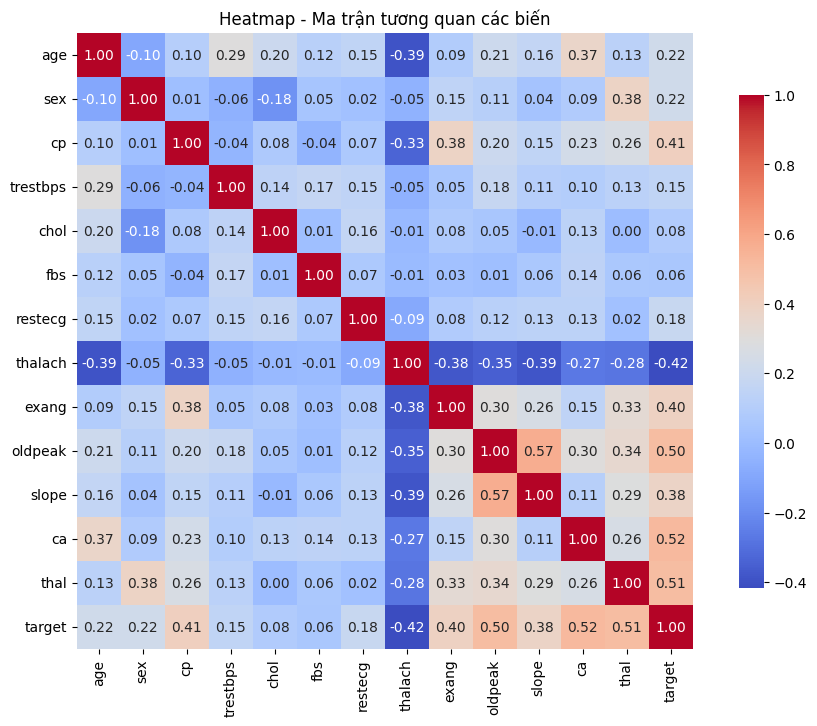

In [ ]:
# T√≠nh ma tr·∫≠n t∆∞∆°ng quan
corr = processed_data.corr()

# V·∫Ω heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title("Heatmap - Ma tr·∫≠n t∆∞∆°ng quan c√°c bi·∫øn")
plt.show()

In [ ]:
# T√°ch d·ªØ li·ªáu t·ª´ processed_data
X = processed_data.drop(['target'], axis=1)
y = processed_data['target'].apply(lambda x: 1 if int(x) > 0 else 0)

In [ ]:
#Chia t·∫≠p train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Chuy·ªÉn m·∫£ng ƒë√£ scale v·ªÅ DataFrame
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Xem d·ªØ li·ªáu tr∆∞·ªõc khi scale
print("D·ªØ li·ªáu X_train TR∆Ø·ªöC khi scale:")
print(X_train.describe().round(2))

print("\nD·ªØ li·ªáu X_test TR∆Ø·ªöC khi scale:")
print(X_test.describe().round(2))

# Xem d·ªØ li·ªáu sau khi scale
print("\nD·ªØ li·ªáu X_train SAU khi scale:")
print(X_train_scaled_df.describe().round(2))

print("\nD·ªØ li·ªáu X_test SAU khi scale:")
print(X_test_scaled_df.describe().round(2))

D·ªØ li·ªáu X_train TR∆Ø·ªöC khi scale:
          age     sex      cp  trestbps    chol     fbs  restecg  thalach  \
count  242.00  242.00  242.00    242.00  242.00  242.00   242.00   242.00   
mean    54.81    0.66    3.09    131.90  245.03    0.14     0.99   150.16   
std      9.11    0.48    0.99     17.17   46.45    0.34     1.00    22.29   
min     29.00    0.00    1.00     94.00  126.00    0.00     0.00    84.75   
25%     48.00    0.00    2.00    120.00  212.00    0.00     0.00   136.00   
50%     56.00    1.00    3.00    130.00  240.00    0.00     0.50   152.50   
75%     61.75    1.00    4.00    140.00  272.50    0.00     2.00   166.75   
max     77.00    1.00    4.00    170.00  371.00    1.00     2.00   202.00   

        exang  oldpeak   slope      ca    thal  
count  242.00   242.00  242.00  242.00  242.00  
mean     0.34     1.02    1.60    0.64    4.67  
std      0.47     1.13    0.62    0.90    1.93  
min      0.00     0.00    1.00    0.00    3.00  
25%      0.00     0.0

In [ ]:
# T·∫°o DataFrame ƒë·ªÉ t√≠nh VIF
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# T√≠nh VIF cho t·ª´ng bi·∫øn
vif_data = pd.DataFrame()
vif_data["Variable"] = X_train_scaled_df.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_scaled_df.values, i)
                   for i in range(X_train_scaled_df.shape[1])]
print(vif_data)


    Variable       VIF
0        age  1.558987
1        sex  1.264659
2         cp  1.344120
3   trestbps  1.241650
4       chol  1.104433
5        fbs  1.075085
6    restecg  1.104379
7    thalach  1.637156
8      exang  1.388426
9    oldpeak  1.681947
10     slope  1.587688
11        ca  1.366042
12      thal  1.481040


In [ ]:
#Hu·∫•n luy·ªán m√¥ h√¨nh
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
#D·ª± ƒëo√°n v√† ƒë√°nh gi√°
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8852459016393442

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61


Confusion Matrix:
 [[25  4]
 [ 3 29]]


In [ ]:
#T√≠nh ROC-AUC
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print("ROC-AUC:", roc_auc)

ROC-AUC: 0.927801724137931


In [ ]:
# L∆∞u model v√† scaler
joblib.dump(model, 'model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("ƒê√£ l∆∞u model v√† scaler th√†nh c√¥ng!")

ƒê√£ l∆∞u model v√† scaler th√†nh c√¥ng!


In [ ]:
!pip install streamlit pyngrok

In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load model v√† scaler
model = joblib.load('model.pkl')
scaler = joblib.load('scaler.pkl')

st.set_page_config(page_title="D·ª± ƒëo√°n b·ªánh tim", page_icon="ü´Ä")
st.title("D·ª± ƒëo√°n nguy c∆° m·∫Øc b·ªánh tim m·∫°ch")
st.write("Nh·∫≠p th√¥ng tin b·ªánh nh√¢n ƒë·ªÉ d·ª± ƒëo√°n nguy c∆° m·∫Øc b·ªánh tim")

# T·∫°o sidebar ƒë·ªÉ nh·∫≠p d·ªØ li·ªáu
st.sidebar.header("Th√¥ng tin b·ªánh nh√¢n")

def user_input_features():
    age = st.sidebar.slider("Tu·ªïi", 29, 77, 50)
    sex = st.sidebar.selectbox("Gi·ªõi t√≠nh", [0, 1], format_func=lambda x: "N·ªØ" if x == 0 else "Nam")
    cp = st.sidebar.selectbox("Lo·∫°i ƒëau ng·ª±c", [0, 1, 2, 3])
    trestbps = st.sidebar.slider("Huy·∫øt √°p ngh·ªâ (mm Hg)", 94, 170, 120)
    chol = st.sidebar.slider("Cholesterol (mg/dl)", 126, 371, 200)
    fbs = st.sidebar.selectbox("ƒê∆∞·ªùng huy·∫øt l√∫c ƒë√≥i > 120 mg/dl", [0, 1], format_func=lambda x: "C√≥" if x == 1 else "Kh√¥ng")
    restecg = st.sidebar.selectbox("ƒêi·ªán t√¢m ƒë·ªì", [0, 1, 2])
    thalach = st.sidebar.slider("Nh·ªãp tim t·ªëi ƒëa (bpm)", 85, 202, 150)
    exang = st.sidebar.selectbox("ƒêau th·∫Øt ng·ª±c khi v·∫≠n ƒë·ªông", [0, 1], format_func=lambda x: "C√≥" if x == 1 else "Kh√¥ng")
    oldpeak = st.sidebar.slider("ST depression", 0.0, 4.0, 1.0)
    slope = st.sidebar.selectbox("ƒê·ªô d·ªëc ST", [0, 1, 2])
    ca = st.sidebar.slider("S·ªë m·∫°ch m√°u ch√≠nh (0-3)", 0, 3, 0)
    thal = st.sidebar.selectbox("Thalassemia", [0, 1, 2, 3])

    # T·∫°o DataFrame cho ph√π h·ª£p input model
    data = {
        'age': age,
        'sex': sex,
        'cp': cp,
        'trestbps': trestbps,
        'chol': chol,
        'fbs': fbs,
        'restecg': restecg,
        'thalach': thalach,
        'exang': exang,
        'oldpeak': oldpeak,
        'slope': slope,
        'ca': ca,
        'thal': thal
    }

    features = pd.DataFrame(data, index=[0])
    return features

# L·∫•y d·ªØ li·ªáu t·ª´ ng∆∞·ªùi d√πng (s·ª≠a t·ª´ user_input() th√†nh user_input_features())
input_data = user_input_features()

# Hi·ªÉn th·ªã d·ªØ li·ªáu
st.subheader("Th√¥ng tin ƒë√£ nh·∫≠p:")

# T·∫°o dictionary ƒë·ªÉ mapping gi√° tr·ªã v·ªõi nh√£n hi·ªÉn th·ªã
def format_display_value(column, value):
    if column == 'sex':
        return "N·ªØ" if value == 0 else "Nam"
    elif column == 'fbs':
        return "C√≥" if value == 1 else "Kh√¥ng"
    elif column == 'exang':
        return "C√≥" if value == 1 else "Kh√¥ng"
    elif column == 'cp':
        cp_labels = {0: "ƒêau ng·ª±c ƒëi·ªÉn h√¨nh", 1: "ƒêau ng·ª±c kh√¥ng ƒëi·ªÉn h√¨nh",
                     2: "ƒêau kh√¥ng do tim", 3: "Kh√¥ng c√≥ tri·ªáu ch·ª©ng"}
        return cp_labels.get(value, f"Lo·∫°i {value}")
    elif column == 'restecg':
        ecg_labels = {0: "B√¨nh th∆∞·ªùng", 1: "B·∫•t th∆∞·ªùng ST-T", 2: "Ph√¨ ƒë·∫°i th·∫•t tr√°i"}
        return ecg_labels.get(value, f"Lo·∫°i {value}")
    elif column == 'slope':
        slope_labels = {0: "D·ªëc l√™n", 1: "Ph·∫≥ng", 2: "D·ªëc xu·ªëng"}
        return slope_labels.get(value, f"Lo·∫°i {value}")
    elif column == 'thal':
        thal_labels = {0: "B√¨nh th∆∞·ªùng", 1: "Khuy·∫øt t·∫≠t c·ªë ƒë·ªãnh",
                       2: "Khuy·∫øt t·∫≠t c√≥ th·ªÉ ph·ª•c h·ªìi", 3: "Kh√¥ng x√°c ƒë·ªãnh"}
        return thal_labels.get(value, f"Lo·∫°i {value}")
    else:
        return value

# Hi·ªÉn th·ªã th√¥ng tin v·ªõi nh√£n ti·∫øng Vi·ªát
labels = {
    'age': "Tu·ªïi",
    'sex': "Gi·ªõi t√≠nh",
    'cp': "Lo·∫°i ƒëau ng·ª±c",
    'trestbps': "Huy·∫øt √°p ngh·ªâ (mmHg)",
    'chol': "Cholesterol (mg/dl)",
    'fbs': "ƒê∆∞·ªùng huy·∫øt l√∫c ƒë√≥i > 120 mg/dl",
    'restecg': "ƒêi·ªán t√¢m ƒë·ªì",
    'thalach': "Nh·ªãp tim t·ªëi ƒëa (bpm)",
    'exang': "ƒêau th·∫Øt ng·ª±c khi v·∫≠n ƒë·ªông",
    'oldpeak': "ST depression",
    'slope': "ƒê·ªô d·ªëc ST",
    'ca': "S·ªë m·∫°ch m√°u ch√≠nh",
    'thal': "Thalassemia"
}

for column in input_data.columns:
    value = input_data[column].iloc[0]
    display_value = format_display_value(column, value)
    st.write(f"- {labels[column]}: {display_value}")

# N√∫t d·ª± ƒëo√°n
if st.button("D·ª± ƒëo√°n"):
    try:
        # Chu·∫©n h√≥a d·ªØ li·ªáu
        input_scaled = scaler.transform(input_data)

        # D·ª± ƒëo√°n x√°c su·∫•t
        prob = model.predict_proba(input_scaled)[0, 1]

        # Ph√¢n lo·∫°i nguy c∆°
        risk = "Nguy c∆° cao" if prob >= 0.5 else "Nguy c∆° th·∫•p"

        # Hi·ªÉn th·ªã k·∫øt qu·∫£
        st.subheader("K·∫øt qu·∫£ d·ª± ƒëo√°n:")

        # Thay ƒë·ªïi m√†u s·∫Øc d·ª±a tr√™n m·ª©c ƒë·ªô nguy c∆°
        if prob >= 0.7:
            st.error(f"‚ö†Ô∏è X√°c su·∫•t m·∫Øc b·ªánh tim: {prob*100:.1f}% - {risk}")
        elif prob >= 0.5:
            st.warning(f"‚ö†Ô∏è X√°c su·∫•t m·∫Øc b·ªánh tim: {prob*100:.1f}% - {risk}")
        else:
            st.success(f"‚úÖ X√°c su·∫•t m·∫Øc b·ªánh tim: {prob*100:.1f}% - {risk}")

        # Hi·ªÉn th·ªã thanh ti·∫øn tr√¨nh
        st.progress(prob)

        # Khuy·∫øn ngh·ªã
        st.subheader("Khuy·∫øn ngh·ªã:")
        if prob >= 0.7:
            st.write("üî¥ **Nguy c∆° r·∫•t cao**: N√™n ƒëi kh√°m tim m·∫°ch ngay l·∫≠p t·ª©c!")
        elif prob >= 0.5:
            st.write("üü° **Nguy c∆° cao**: N√™n tham kh·∫£o √Ω ki·∫øn b√°c sƒ© chuy√™n khoa tim m·∫°ch.")
        else:
            st.write("üü¢ **Nguy c∆° th·∫•p**: Duy tr√¨ l·ªëi s·ªëng l√†nh m·∫°nh v√† kh√°m s·ª©c kh·ªèe ƒë·ªãnh k·ª≥.")

    except Exception as e:
        st.error(f"L·ªói khi d·ª± ƒëo√°n: {str(e)}")
        st.write("Vui l√≤ng ki·ªÉm tra l·∫°i file model.pkl v√† scaler.pkl")

2025-06-20 10:28:00.746 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:28:00.748 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:28:00.749 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:28:00.755 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:28:00.756 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:28:00.757 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:28:00.758 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-06-20 10:28:00.760 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
!pip show streamlit
!pip show transformers
!pip show pyngrok

In [ ]:
!rm -rf /root/.ngrok2/ngrok.yml

In [ ]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2025-06-20 10:28:21--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 35.71.179.82, 75.2.60.68, 99.83.220.108, ...
Connecting to bin.equinox.io (bin.equinox.io)|35.71.179.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13921656 (13M) [application/octet-stream]
Saving to: ‚Äòngrok-stable-linux-amd64.zip‚Äô

ngrok-stable-linux- 100%[===================>]  13.28M  19.0MB/s    in 0.7s    

2025-06-20 10:28:22 (19.0 MB/s) - ‚Äòngrok-stable-linux-amd64.zip‚Äô saved [13921656/13921656]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [ ]:
!ngrok config add-authtoken 2xUIVFYU2YvFW3y6YFfgXHSFYx1_3JUNxFUJqN1cZazyR8XTn

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
!./ngrok http 8501

Usage of ngrok requires a verified account and authtoken.

Sign up for an account: https://dashboard.ngrok.com/signup
Install your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken

ERR_NGROK_4018



In [ ]:
!streamlit run app.py &>/dev/null&

In [ ]:
!ls

app.py	model.pkl  ngrok  ngrok-stable-linux-amd64.zip	sample_data  scaler.pkl


In [ ]:
pip install streamlit transformers torch

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 96.6 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 82.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î

In [ ]:
!streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.69.129.68:8501

  Stopping...
  Stopping...


In [ ]:
!streamlit run app.py --server.port 8501 --server.headless true &>/dev/null&

In [ ]:
!lsof -i:8501

COMMAND    PID USER   FD   TYPE DEVICE SIZE/OFF NODE NAME
streamlit 3737 root    6u  IPv4 106512      0t0  TCP *:8501 (LISTEN)
streamlit 3737 root    7u  IPv6 106513      0t0  TCP *:8501 (LISTEN)


In [ ]:
!ps aux | grep streamlit

root        3737 23.3  0.4  69720 58640 ?        S    10:31   0:00 /usr/bin/python3 /usr/local/bin/streamlit run app.py --server.port 8501 --server.headless true
root        3750  0.0  0.0   7376  3460 ?        S    10:31   0:00 /bin/bash -c ps aux | grep streamlit
root        3752  0.0  0.0   6484  2280 ?        S    10:31   0:00 grep streamlit


In [ ]:
from pyngrok import ngrok

# M·ªü c·ªïng ngrok ƒë·ªÉ t·∫°o URL c√¥ng khai
public_url = ngrok.connect(8501)  # 8501 l√† c·ªïng m·∫∑c ƒë·ªãnh c·ªßa Streamlit
print("M·ªü ·ª©ng d·ª•ng t·∫°i:", public_url)

M·ªü ·ª©ng d·ª•ng t·∫°i: NgrokTunnel: "https://b104-34-69-129-68.ngrok-free.app" -> "http://localhost:8501"
